# EDA

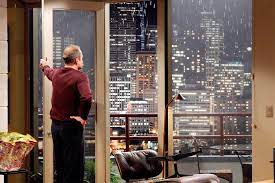

In [2]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df_import = pd.read_csv('data/King_County_House_prices_dataset.csv')
df_import.shape

(21597, 21)

In [4]:
df_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df_import.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df_import['date'] = pd.to_datetime(df_import['date'], format='%m/%d/%Y')  #%Y/%m/%d  we should arrage the date according to arrage of was come  in origin data

In [7]:
df_import['sold_year'] = df_import['date'].dt.year
df_import['sold_month'] = df_import['date'].dt.month
df_import['sold_day'] = df_import['date'].dt.dayofweek  # extract day of week by (Monday is represented by 0, Tuesday by 1, and so on),


In [8]:
df_import.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement            object
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
sold_year                 int64
sold_month                int64
sold_day                  int64
dtype: object

In [9]:
type(df_import['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
#df_import['yr_renovated'] = df_import['yr_renovated'].fillna(0).astype(int)  # we should convert year of renovation to integer but we found error 
# because Nan value so we decided to fill all NaN with value 0



In [11]:
df_import.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sold_year,sold_month,sold_day
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,1955,0.000,98178,47.511,-122.257,1340,5650,2014,10,0
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,1951,1991.000,98125,47.721,-122.319,1690,7639,2014,12,1
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,1933,NaN,98028,47.738,-122.233,2720,8062,2015,2,2
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,1965,0.000,98136,47.521,-122.393,1360,5000,2014,12,1
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,1987,0.000,98074,47.617,-122.045,1800,7503,2015,2,2


In [12]:
df_import.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sold_year,sold_month,sold_day
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,...,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,...,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284,2014.323,6.574,2.011
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,...,29.375,399.946,53.513,0.139,0.141,685.230,27274.442,0.468,3.115,1.461
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,...,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,2014.000,1.000,0.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,...,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,2014.000,4.000,1.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,...,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,2014.000,6.000,2.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,...,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,2015.000,9.000,3.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,...,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000,2015.000,12.000,6.000


In [13]:
# check for duplicate rows in video_id column
df_import["id"].duplicated().value_counts()

False    21420
True       177
Name: id, dtype: int64

In [14]:
df_import.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
sold_year           0
sold_month          0
sold_day            0
dtype: int64

<AxesSubplot:>

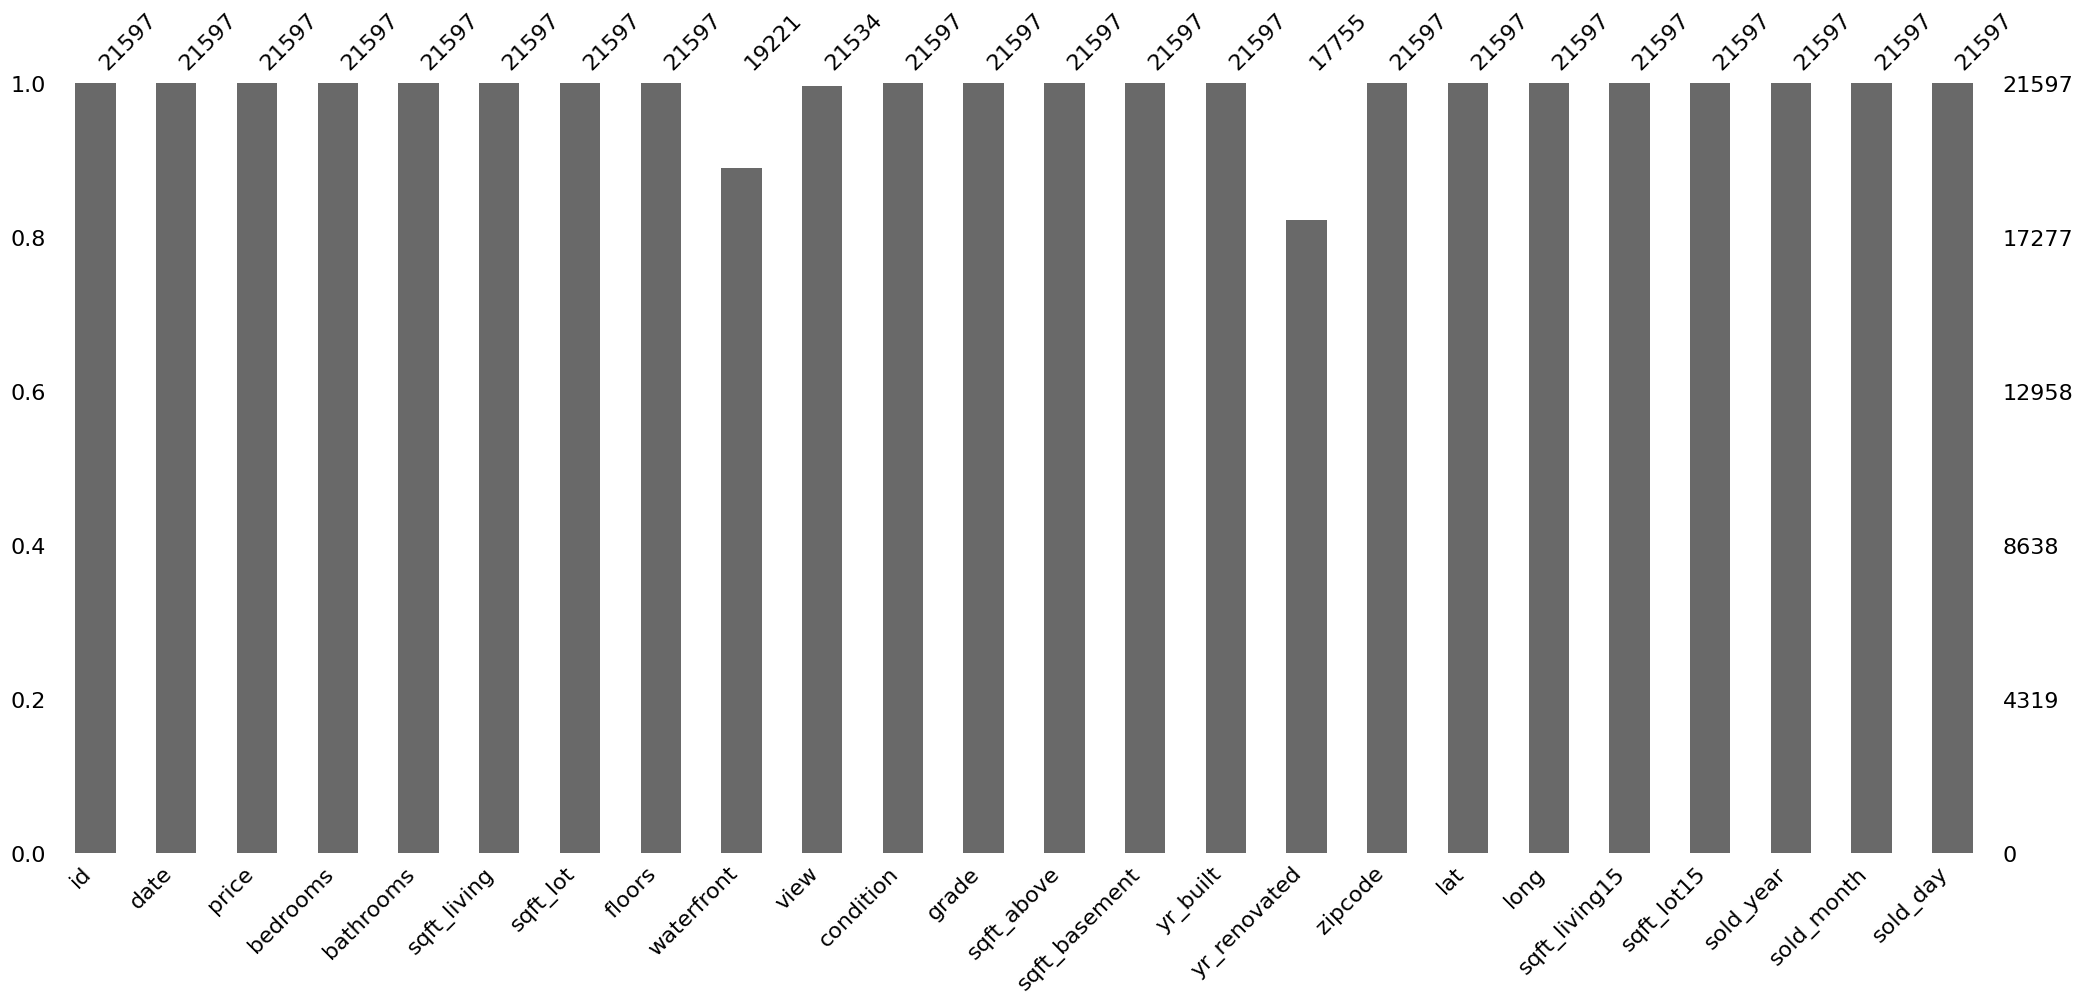

In [15]:
import missingno as msno
msno.bar(df_import)

In [16]:
value_2=df_import['yr_renovated'].isna().sum()/len(df_import['yr_renovated'])*100
print(f"percent of = {value_2.round(2)} %")

percent of = 17.79 %


In [17]:
value_2=df_import['waterfront'].isna().sum()/len(df_import['waterfront'])*100
print(f"percent of = {value_2.round(2)} %")

percent of = 11.0 %


In [18]:
value_2=df_import['view'].isna().sum()/len(df_import['view'])*100
print(f"percent of = {value_2.round(2)} %")

percent of = 0.29 %


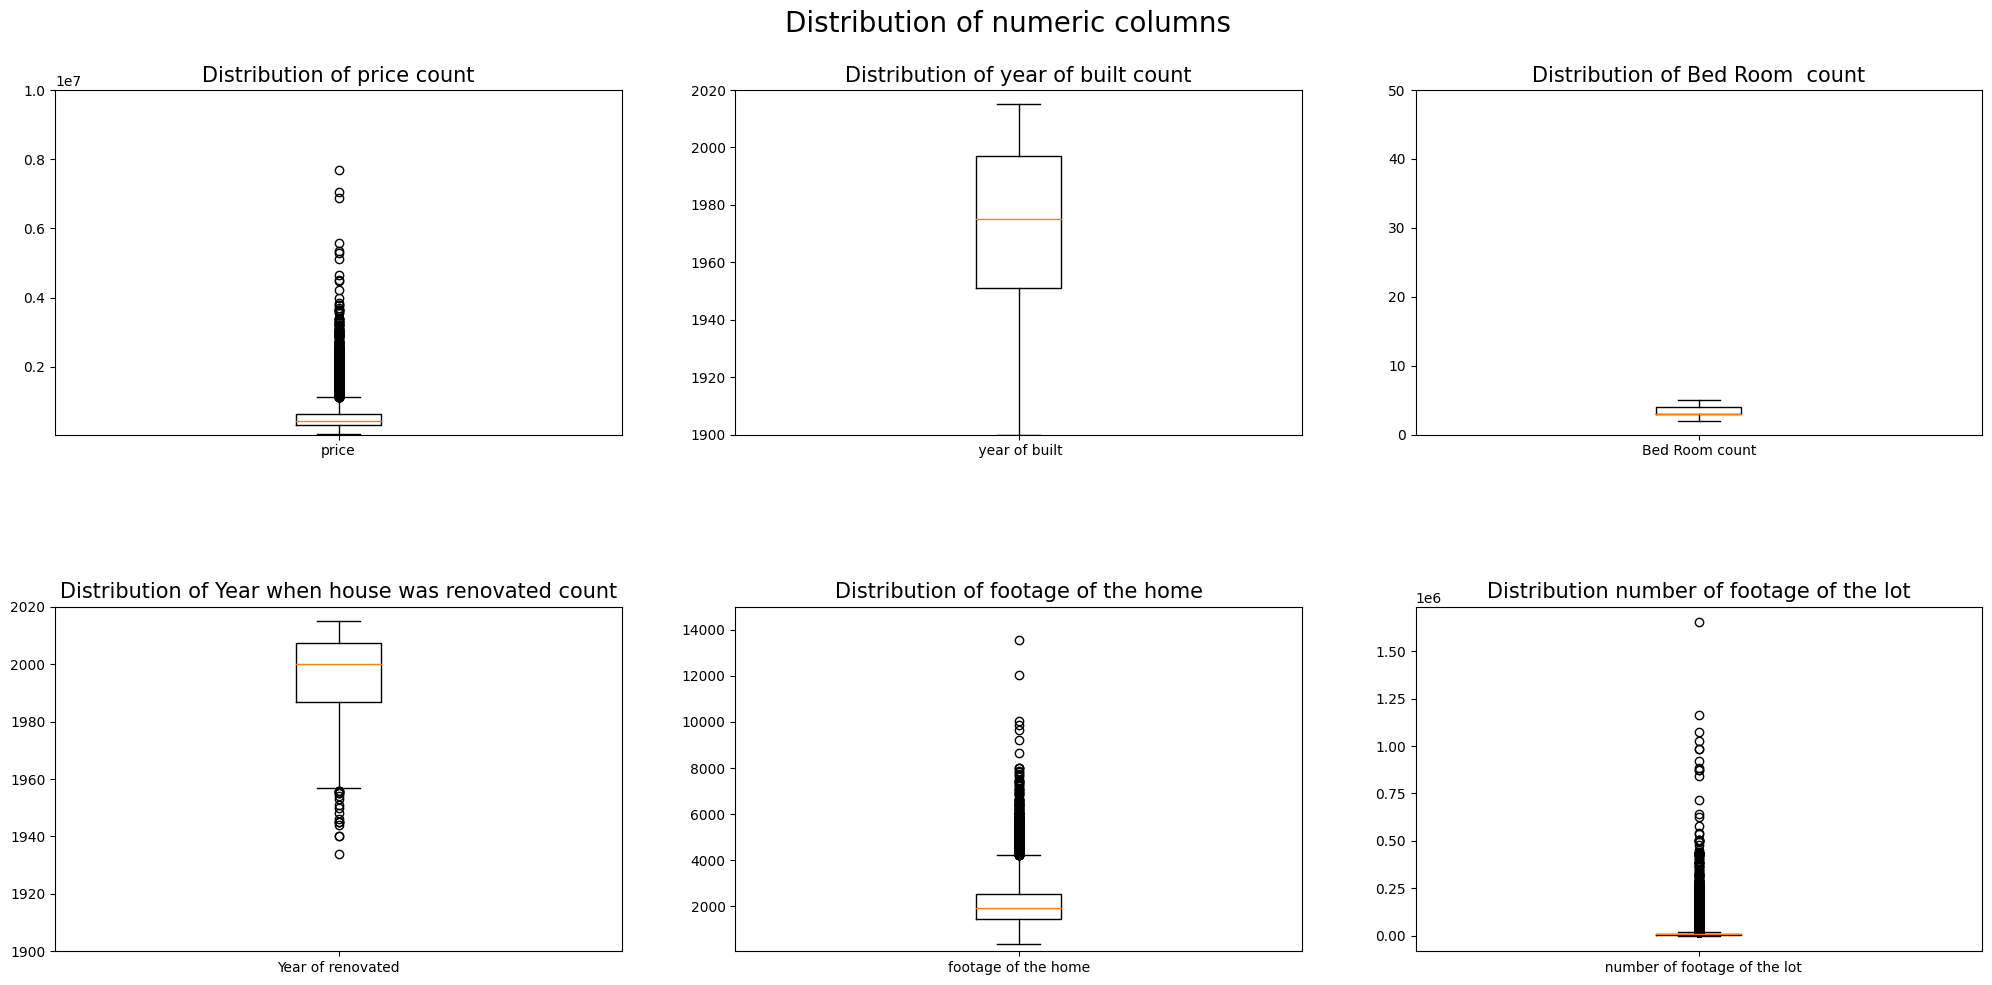

In [19]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].boxplot(x = df_import['price'], ) # creates boxplot for number of prices
ax[0][0].set_xticklabels(labels=["price"]) # sets the label for the ticks on the x-axis
ax[0][0].set_ylim(50000,10000000) # limits the y-axis values from 0 to 2000000 
ax[0][0].set_title("Distribution of price count", fontsize = 15); # sets title for subplot

ax[0][1].boxplot(x = df_import['yr_built'])
ax[0][1].set_xticklabels(labels=[" year of built"])
ax[0][1].set_ylim(1900,2020)
ax[0][1].set_title("Distribution of year of built count", fontsize = 15);

#ax[0][2].boxplot(x = df_import['bedrooms'])
ax[0][2].boxplot(x = df_import['bedrooms'], showfliers=False)
ax[0][2].set_xticklabels(labels=["Bed Room count"])
ax[0][2].set_ylim(0,50)
ax[0][2].set_title("Distribution of Bed Room  count", fontsize = 15);


ax[1][0].boxplot(x = df_import[df_import['yr_renovated']>0]['yr_renovated'])
ax[1][0].set_xticklabels(labels=["Year of renovated"])
ax[1][0].set_ylim(1900,2020)
ax[1][0].set_title("Distribution of Year when house was renovated count", fontsize = 15);
                              
ax[1][1].boxplot(x = df_import['sqft_living'])
ax[1][1].set_xticklabels(labels=["footage of the home"])
ax[1][1].set_ylim(50,15000)
ax[1][1].set_title("Distribution of footage of the home", fontsize = 15);

ax[1][2].boxplot(x = df_import['sqft_lot'])
ax[1][2].set_xticklabels(labels=["  number of footage of the lot"])
#ax[1][2].set_ylim(1900,2020)
ax[1][2].set_title("Distribution number of footage of the lot", fontsize = 15);


#fig.delaxes(ax[1][2]);

In [20]:
df_import['yr_renovated'].value_counts()

0.000       17011
2014.000       73
2013.000       31
2003.000       31
2007.000       30
            ...  
1951.000        1
1953.000        1
1946.000        1
1976.000        1
1948.000        1
Name: yr_renovated, Length: 70, dtype: int64

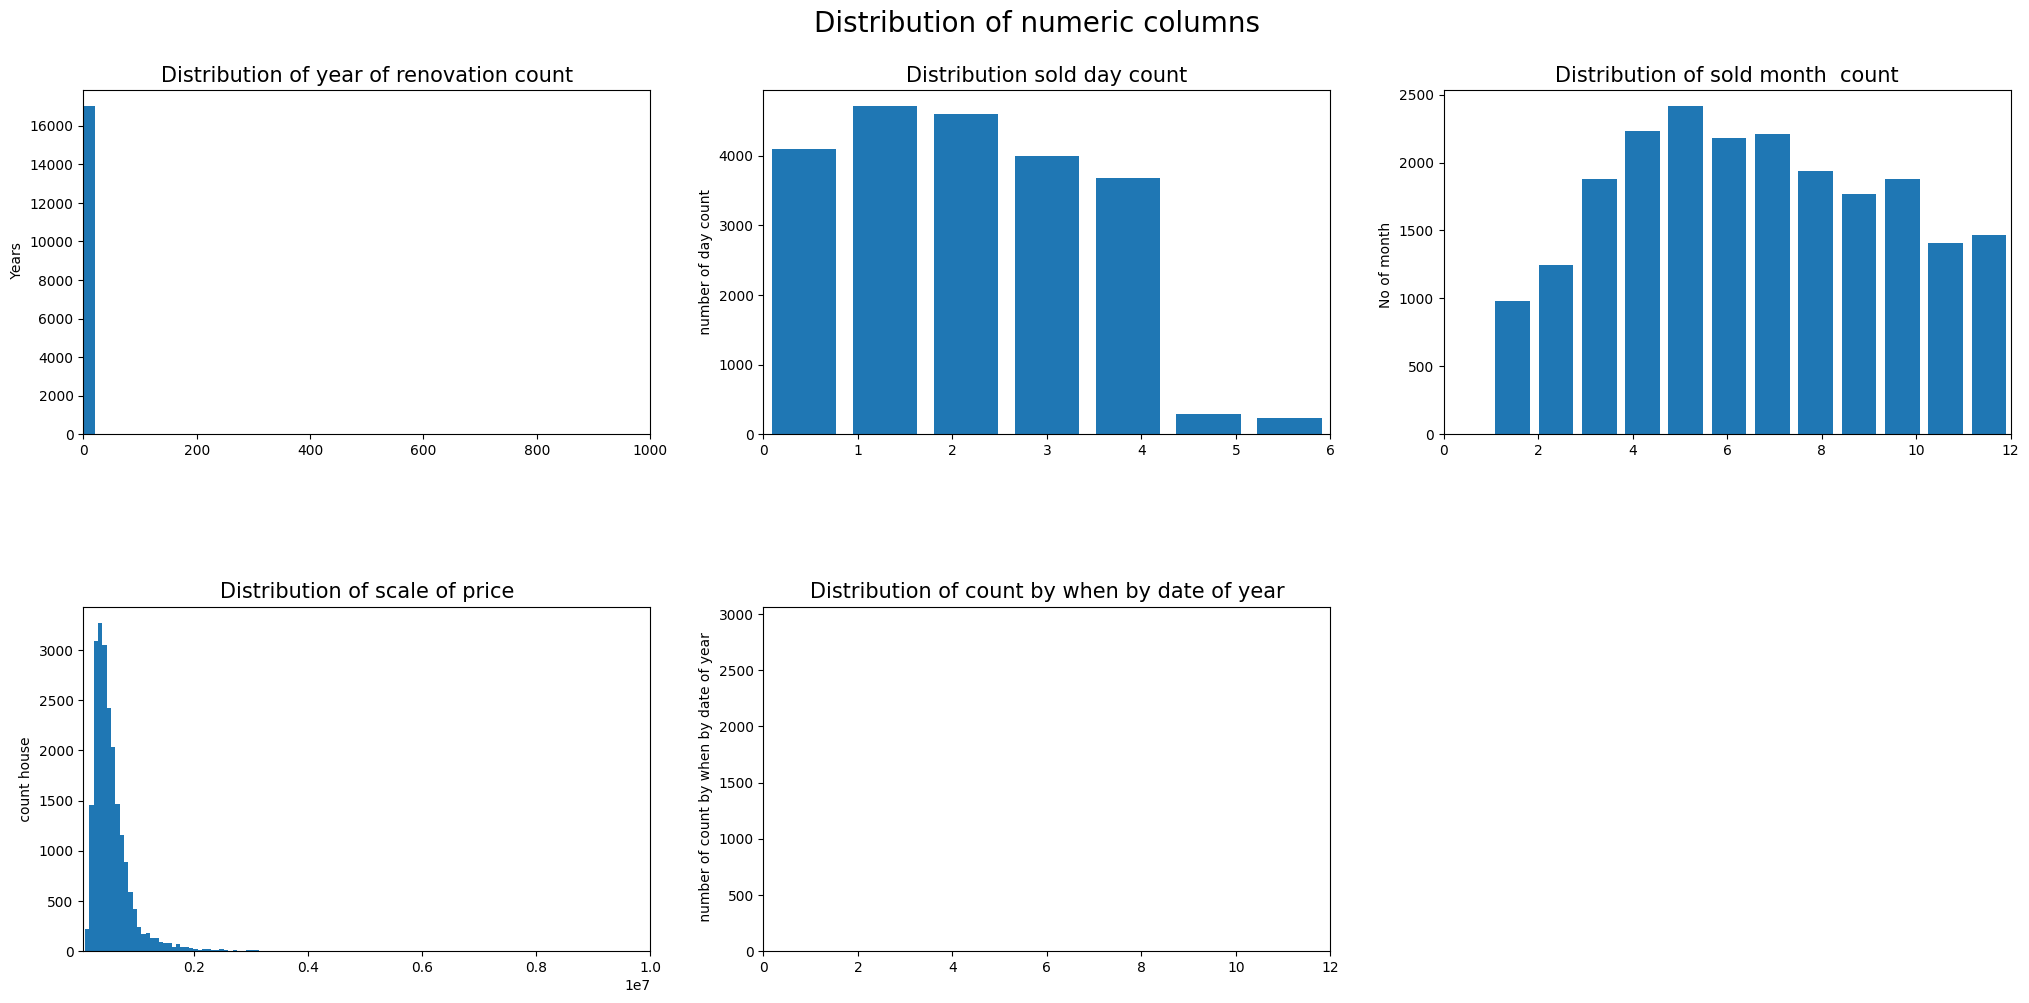

In [21]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].hist(x=df_import['yr_renovated'], bins=100)  # creates histogram for number of views
ax[0][0].set_ylabel(" Years", fontsize = 10) # sets the label y-axis
ax[0][0].set_xlim(0,1000) # limits the x-axis values from 0 to 1000000 
ax[0][0].set_title("Distribution of year of renovation count", fontsize = 15);  # sets title for subplot

ax[0][1].hist(x= df_import['sold_day'], bins=7, rwidth=.8)
ax[0][1].set_ylabel(" number of day count ", fontsize = 10)
ax[0][1].set_xlim(0,6)
ax[0][1].set_title("Distribution sold day count", fontsize = 15);

ax[0][2].hist(x=df_import['sold_month'], bins=12 , rwidth=0.8)
ax[0][2].set_ylabel("No of month ", fontsize = 10)
ax[0][2].set_xlim(0,12)
ax[0][2].set_title("Distribution of sold month  count", fontsize = 15);

ax[1][0].hist(x=df_import['price'], bins=100)
ax[1][0].set_ylabel(" count house ", fontsize = 10)
ax[1][0].set_xlim(50000,10000000)
ax[1][0].set_title("Distribution of scale of price", fontsize = 15);
                              
ax[1][1].hist(x=df_import['yr_built'], bins=12)
ax[1][1].set_ylabel(" number of count by when by date of year", fontsize = 10)
ax[1][1].set_xlim(0,12)
ax[1][1].set_title("Distribution of count by when by date of year", fontsize = 15);

fig.delaxes(ax[1][2]);

In [22]:
#df_import[['yr_renovated','yr_built']].head(10).reset_index()
all_1=df_import.groupby(df_import['yr_built'])
data_2=all_1['price'].value_counts()
data_2

yr_built  price      
1900      550000.000     3
          850000.000     3
          210000.000     2
          240000.000     2
          415000.000     2
                        ..
2015      1150000.000    1
          1550000.000    1
          1700000.000    1
          1800000.000    1
          2000000.000    1
Name: price, Length: 17343, dtype: int64

In [23]:
all_1=df_import.groupby(df_import['sold_year'])
all_1['id','sold_month'].count().reset_index()

,sold_year,id,sold_month
0,2014,14622,14622
1,2015,6975,6975


In [24]:
# grouped_data = df_import.groupby('zipcode')['price'].mean() ['lat']
# grouped_data.reset_index()
grouped_data = df_import.groupby('zipcode')['price','lat','long'].mean()
grouped_data.reset_index()


,zipcode,price,lat,long
0,98001,281194.870,47.309,-122.271
1,98002,234284.035,47.309,-122.213
2,98003,294111.279,47.316,-122.310
3,98004,1356523.991,47.616,-122.205
4,98005,810289.696,47.612,-122.167
...,...,...,...,...
65,98177,676419.392,47.742,-122.369
66,98178,310612.756,47.499,-122.247
67,98188,289078.346,47.447,-122.281
68,98198,302896.739,47.391,-122.316


In [25]:
grouped_data=  df_import.groupby('zipcode')['price'].mean().reset_index()
grouped_data[['zipcode', 'price']]

,zipcode,price
0,98001,281194.870
1,98002,234284.035
2,98003,294111.279
3,98004,1356523.991
4,98005,810289.696
...,...,...
65,98177,676419.392
66,98178,310612.756
67,98188,289078.346
68,98198,302896.739


In [29]:
import altair as alt
altair_viewer.show(chart)
alt.renderers.enable('altair_viewer', inline=True)


# Assuming df_import is your DataFrame containing zip code, latitude, and longitude columns
grouped_data = df_import.groupby('zipcode')['price'].mean().reset_index()

merged_data = grouped_data[['zipcode', 'price']].merge(df_import[['zipcode', 'lat', 'long']], on='zipcode').drop_duplicates()

# Set up the scatter plot using Altair
scatter_plot = alt.Chart(merged_data).mark_circle().encode(
    longitude='long:Q',
    latitude='lat:Q',
    color='price:Q',
    size='price:Q',
    tooltip=['zipcode:N', 'price:Q']
).properties(
    title='Average Price by Zip Code'
)

# Set the map projection
map_plot = alt.Chart(merged_data).mark_geoshape(
    stroke='black',
    strokeWidth=0.5
).encode(
    color='price:Q'
).transform_lookup(
    lookup='zipcode',
    from_=alt.LookupData(merged_data, 'zipcode', ['price'])
).project('identity')

# Combine the scatter plot and map plot
chart = scatter_plot + map_plot

# Enable rendering in Jupyter Notebook
alt.renderers.enable('notebook')

# Display the chart
chart



NameError: name 'altair_viewer' is not defined

In [ ]:
import altair as alt

# Assuming df_import is your DataFrame containing zip code, latitude, and longitude columns
grouped_data = df_import.groupby('zipcode')['price'].mean().reset_index()

merged_data = grouped_data[['zipcode', 'price']].merge(df_import[['zipcode', 'lat', 'long']], on='zipcode').drop_duplicates()

# Set up the scatter plot using Altair
scatter_plot = alt.Chart(merged_data).mark_circle().encode(
    longitude='long:Q',
    latitude='lat:Q',
    color='price:Q',
    size='price:Q',
    tooltip=['zipcode:N', 'price:Q']
).properties(
    title='Average Price by Zip Code'
)

# Set the map projection
map_plot = alt.Chart(merged_data).mark_geoshape(
    stroke='black',
    strokeWidth=0.5
).encode(
    color='price:Q'
).transform_lookup(
    lookup='zipcode',
    from_=alt.LookupData(merged_data, 'zipcode', ['price'])
).project('identity')

# Combine the scatter plot and map plot
chart = scatter_plot + map_plot

chart = chart.interactive()


# Show the chart
chart.show()


MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). For information on how to plot larger datasets in Altair, see the documentation

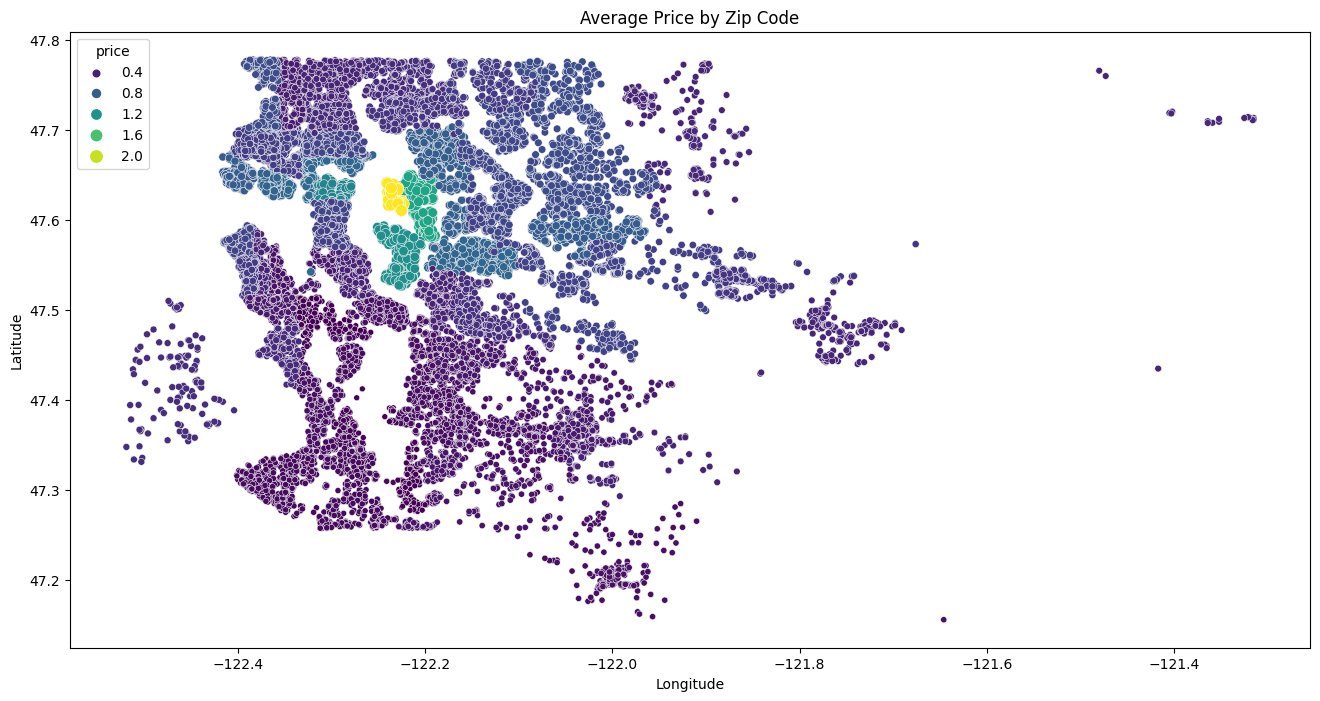

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_import is your DataFrame containing zip code, latitude, and longitude columns
grouped_data = df_import.groupby('zipcode')['price'].mean().reset_index()

merged_data = grouped_data[['zipcode', 'price']].merge(df_import[['zipcode', 'lat', 'long']], on='zipcode').drop_duplicates()

# Set the figure size
fig, ax = plt.subplots(figsize=(16, 8))

# Use scatter plot with seaborn
sns.scatterplot(data=merged_data, x='long', y='lat', hue='price', size='price', palette='viridis', ax=ax)

# Set the title and labels
ax.set_title('Average Price by Zip Code')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


In [ ]:

import plotly.express as px

# Assuming df_import is your DataFrame containing zip code, latitude, and longitude columns
grouped_data = df_import.groupby('zipcode')['price'].mean().reset_index()

merged_data = grouped_data[['zipcode', 'price']].merge(df_import[['zipcode', 'lat', 'long']], on='zipcode').drop_duplicates()

fig = px.scatter_mapbox(merged_data, lat='lat', lon='long', hover_data=['zipcode', 'price'])
fig.update_layout(mapbox_style='carto-positron')
fig.show()



In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the zip code boundaries shapefile
zipcodes_shapefile = 'path/to/zipcodes_shapefile.shp'
zipcodes_gdf = gpd.read_file(zipcodes_shapefile)

# Merge the zip code boundaries with the 'price' data
merged_data = zipcodes_gdf.merge(grouped_data, left_on='zipcode_column_in_shapefile', right_on='zipcode', how='left')

# Plot the choropleth map
fig, ax = plt.subplots(figsize=(10, 6))
merged_data.plot(column='price', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Price by Zip Code')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()


ModuleNotFoundError: No module named 'geopandas'

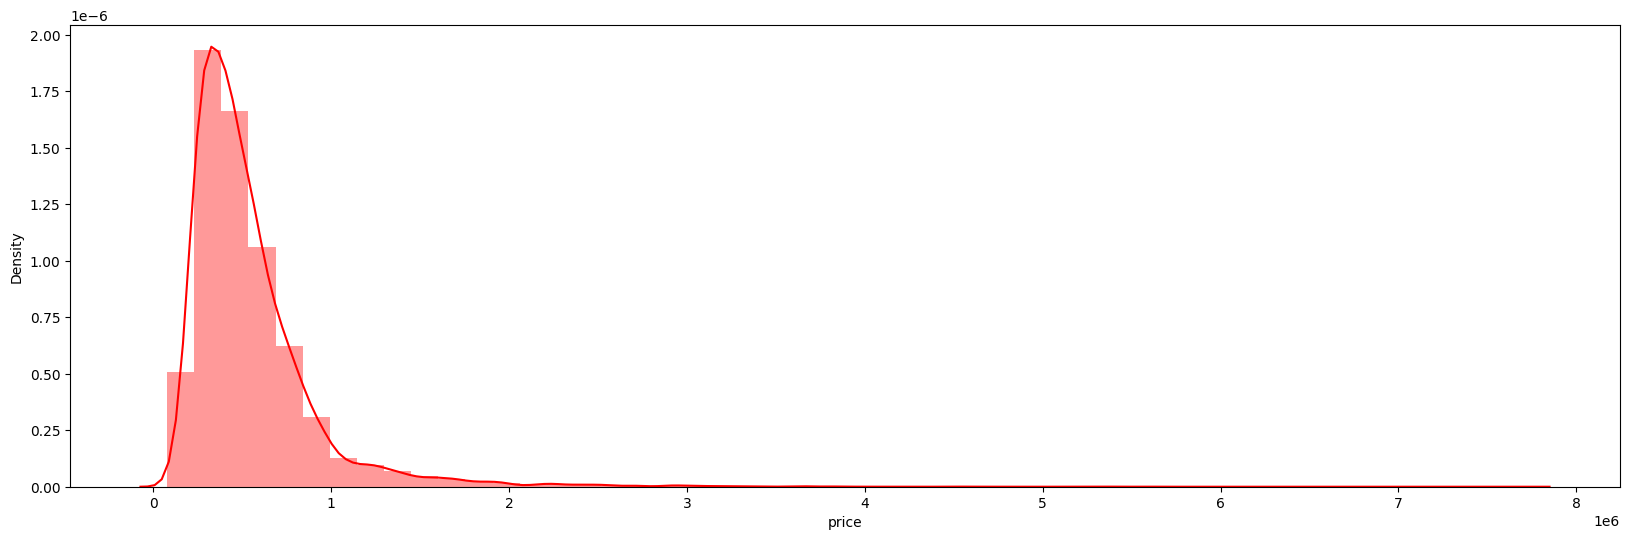

In [ ]:
#print(df_import['SalePrice'].describe())

plt.figure(figsize=(20, 6))
sns.distplot(df_import['price'], color='r', bins=50, hist_kws={'alpha': 0.4});

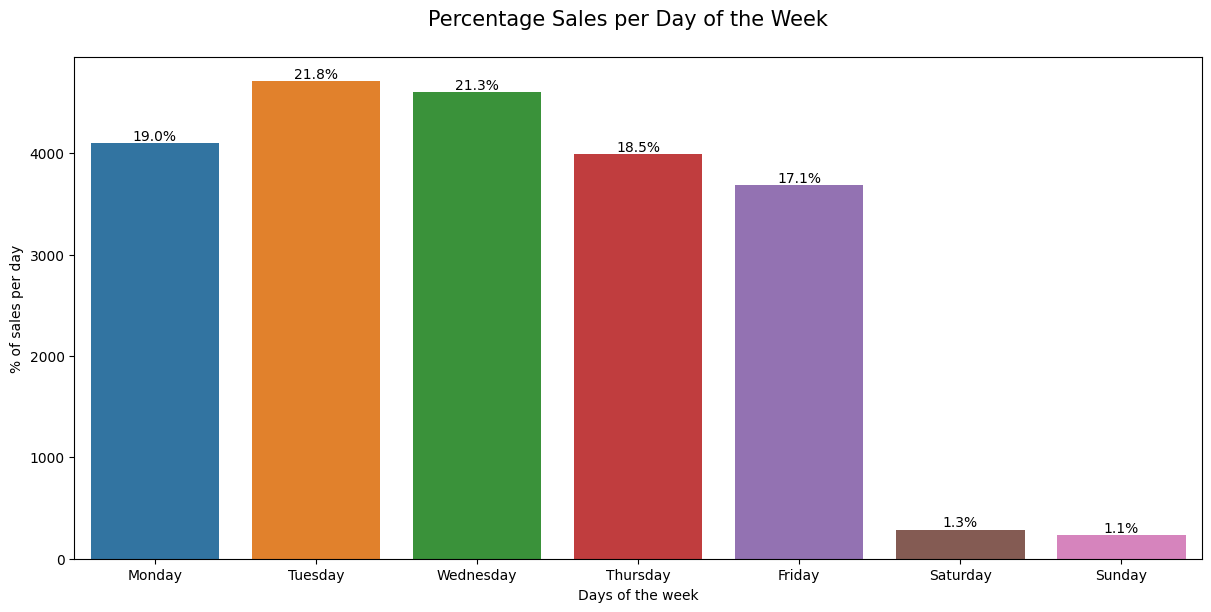

In [ ]:



fig, ax = plt.subplots(figsize=(12, 6))
plt.suptitle('Percentage Sales per Day of the Week', fontsize=15)
fig.tight_layout(h_pad=8)
plt.subplots_adjust(hspace=.5, wspace=.2, top=.9)

f1 = sns.countplot(x=df_import['sold_day'])
f1.set_ylabel("% of sales per day", fontsize=10)
f1.set_xlabel("Days of the week", fontsize=10)
f1.set_xticks([0, 1, 2, 3, 4, 5, 6])
f1.set_xticklabels(labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# Calculate the total count


# Add labels with percentage values on top of each bar
for p in f1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df_import['sold_day']))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    f1.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()



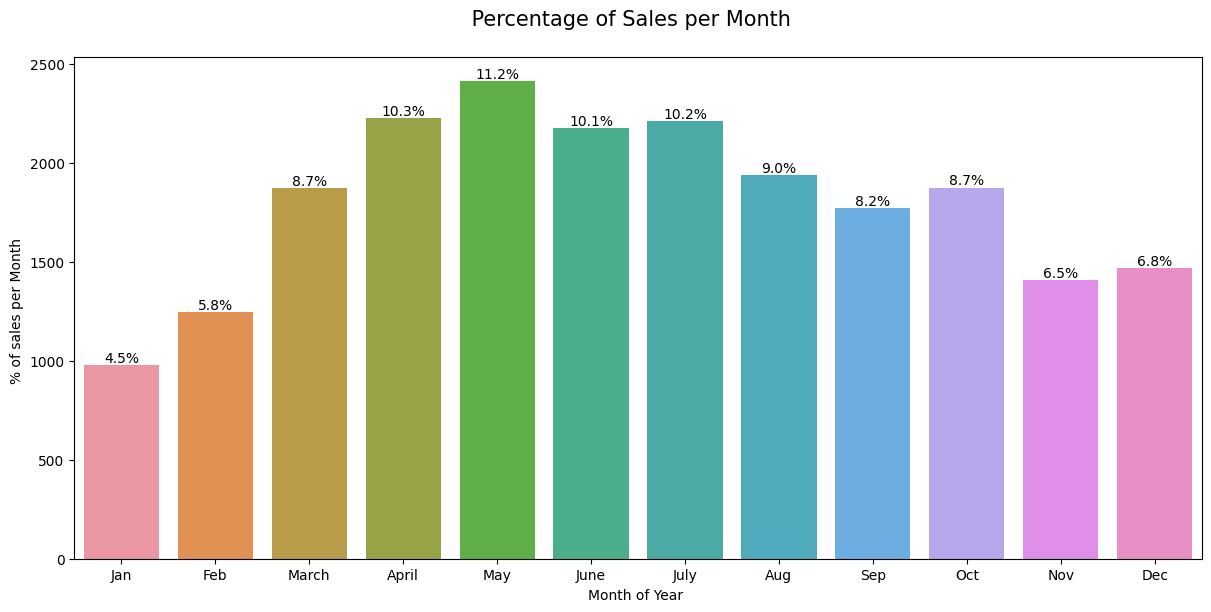

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.suptitle(' Percentage of Sales per Month', fontsize=15)
fig.tight_layout(h_pad=8)
plt.subplots_adjust(hspace=.5, wspace=.2, top=.9)

f1 = sns.countplot(x=df_import['sold_month'])
f1.set_ylabel("% of sales per Month ", fontsize=10)
f1.set_xlabel("Month of Year ", fontsize=10)
f1.set_xticks([0, 1, 2, 3, 4, 5, 6,7,8,9,10,11])
f1.set_xticklabels(labels=["Jan", "Feb", "March", "April", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"])

for p in f1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df_import['sold_month']))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    f1.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# # Add labels with count values on top of each bar
# for p in f1.patches:
#     f1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
#                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()


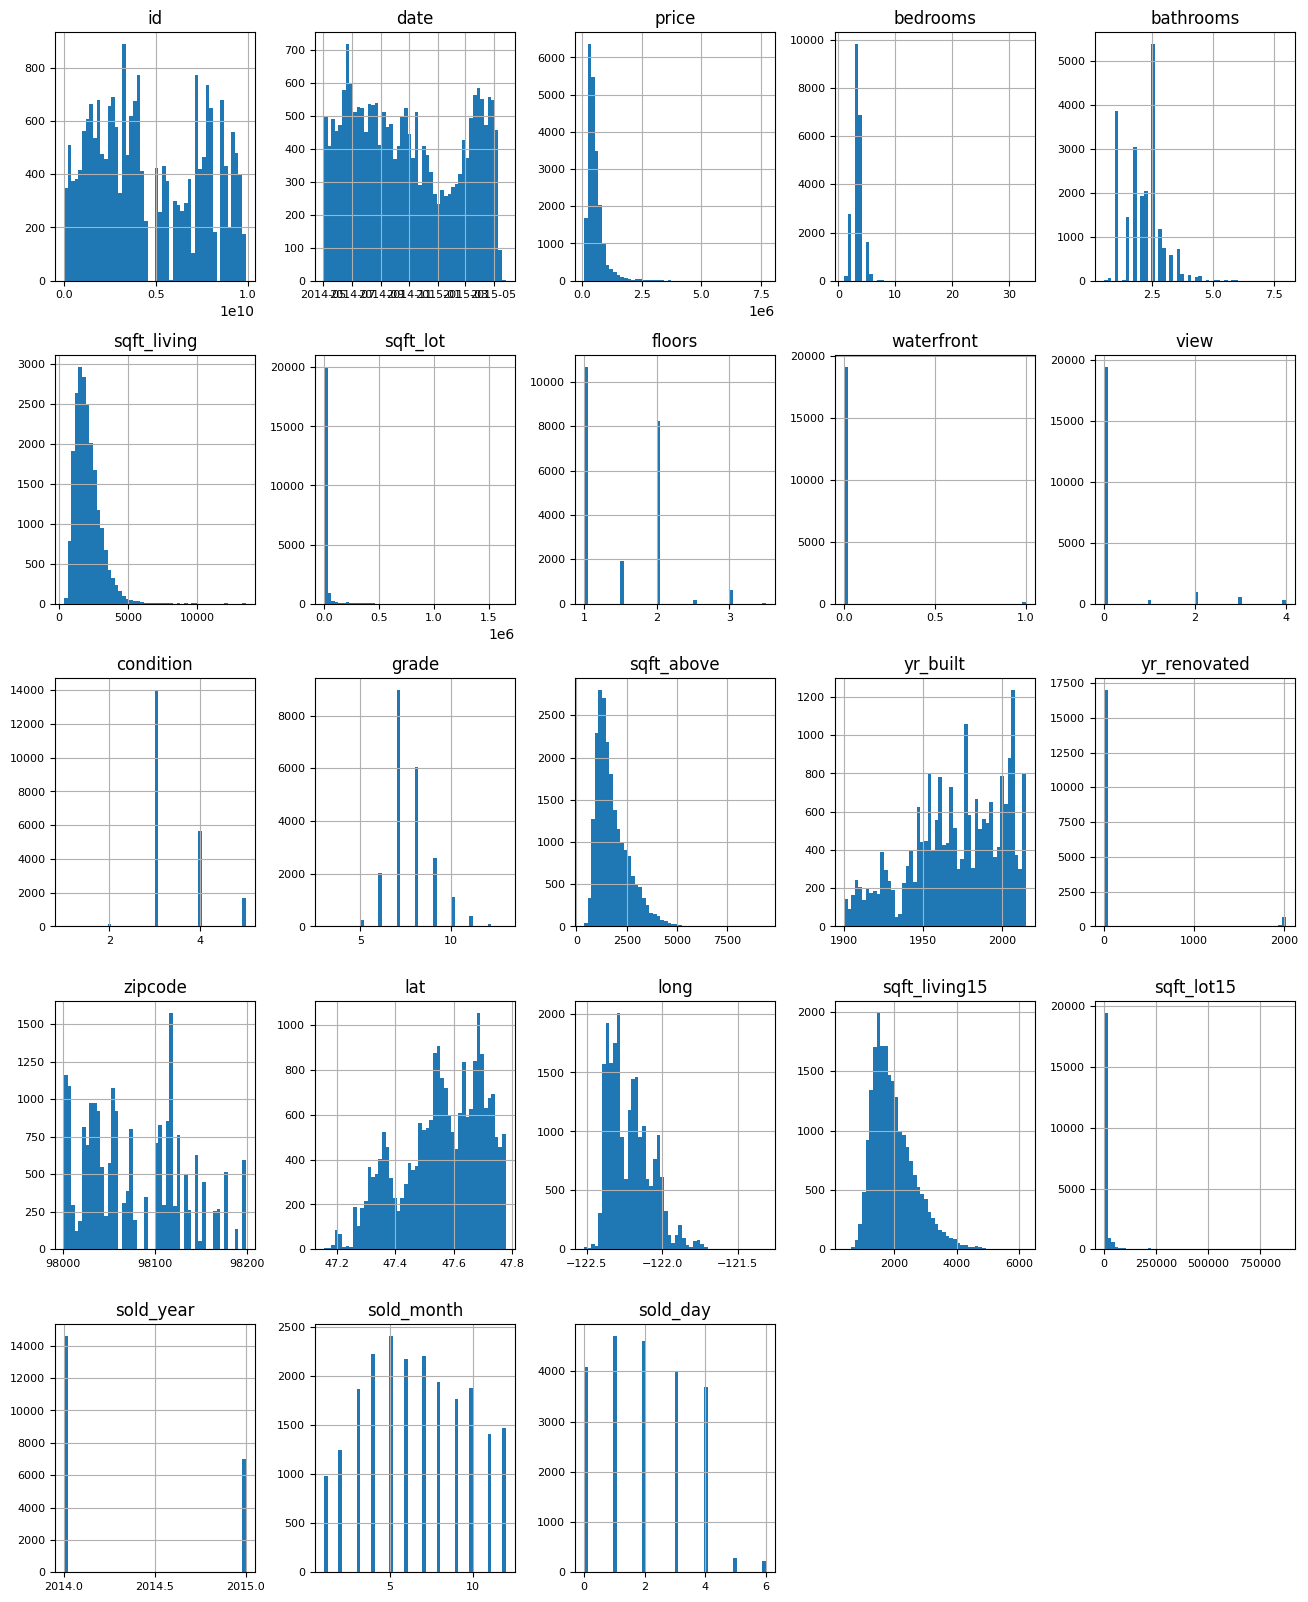

In [ ]:

df_import.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

In [ ]:
import pandas as pd
import plotly.express as px
import json

# Assuming df_import is your DataFrame containing zip code, latitude, and longitude columns
grouped_data = df_import.groupby('zipcode')['price'].mean().reset_index()

# Load GeoJSON data for zip code boundaries from a file
with open('data/geojson-tutorial_zip/datapackage.json') as file:
    geojson_data = json.load(file)

fig = px.choropleth_mapbox(
    grouped_data,
    geojson=geojson_data,
    locations='zipcode',
    color='price',
    hover_data=['zipcode', 'price'],
    mapbox_style='carto-positron',
    center={"lat": df_import['lat'].mean(), "lon": df_import['long'].mean()},
    zoom=10
)

fig.update_layout(title='Average Price by Zip Code')
fig.show()


## In Brief the main idea :
My stakholder Charles Christensen selling   his/her persective for  Invest with big returns, wondering about renovation?, which Neighborhood? Timing?

And more care about time because time mean return investment 
## questions
* Dose year or month or days affect selling     
....then Hypothesie which best months or day of sell
* Dose renovation of house affect  selling  .......then Hypothesie renovated good or bad renovated 
* Dose the location for zipcode and latitude and longitude affect selling ...then Hypothesie which place locations near to center or outskirt 
     
